# SOM Training on RGB Colors Dataset


In [31]:
import torch
import matplotlib
import numpy as np
import random
from fastsom import *

### Creating the DataBunch

In [32]:
def colors():
    # Set color dataset
    colors = np.empty((0,3), float)
    colors = np.append(colors, np.array([[0, 0, 0]]), axis=0)
    colors = np.append(colors, np.array([[1, 1, 1]]), axis=0)
    for i in range(20):
        colors = np.append(colors, np.array([[0, 0, random.random()]]), axis=0)
        colors = np.append(colors, np.array([[0, random.random(), 0]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), 0, 0]]), axis=0)
        colors = np.append(colors, np.array([[1, 1, random.random()]]), axis=0)
        colors = np.append(colors, np.array([[1, random.random(), 1]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), 1, 1]]), axis=0)
        colors = np.append(colors, np.array([[0, random.random(), random.random()]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), random.random(), 0]]), axis=0)
        colors = np.append(colors, np.array([[1, random.random(), random.random()]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), random.random(), 1]]), axis=0)
        colors = np.append(colors, np.array([[random.random(), random.random(), random.random()]]), axis=0)
    x = torch.tensor(colors)
    y = None
    labels = ['Red', 'Green', 'Blue']
    
    return x, y, labels

In [33]:
x, y, labels = colors()

In [34]:
db = UnsupervisedDataBunch(x, valid=0.05, sampler='shuffle', bs=50)

### Normalization

For this step we will use the variance normalizer, which in our tests seems to work really well with Self-Organizing Maps.

In [35]:
db.normalize('var')

In [36]:
d = db.train_ds.tensors[0]
d.mean(0), d.std(0)

(tensor([ 2.3896e-16,  3.1403e-16, -6.3441e-18], dtype=torch.float64),
 tensor([1.0000, 1.0000, 1.0000], dtype=torch.float64))

### Creating the Learner

In [37]:
size = (10, 10, 3)

som = Som(size)

learn = SomLearner(db, 
    som,
    lr=[0.6, 0.3, 0.1], 
    metrics=[topologic_err],
    visualize=['weights'],
    trainer=ExperimentalSomTrainer)

### Training the model

<IPython.core.display.Javascript object>


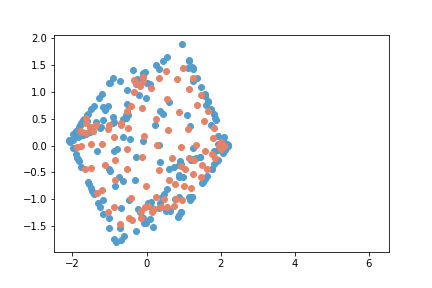

epoch,train_loss,valid_loss,topologic_err,time
0,1.650058,1.236506,7.000000,00:00
1,1.355656,1.068928,5.000000,00:00
2,1.185822,1.037629,6.000000,00:00
3,1.072064,1.026925,7.000000,00:00
4,1.014226,1.030034,6.000000,00:00
5,0.976400,1.015444,6.000000,00:00
6,0.944191,1.038827,7.000000,00:00
7,0.924332,1.034140,6.000000,00:00
8,0.909263,1.026976,6.000000,00:00
9,0.894357,1.046265,6.000000,00:00


<IPython.core.display.Javascript object>


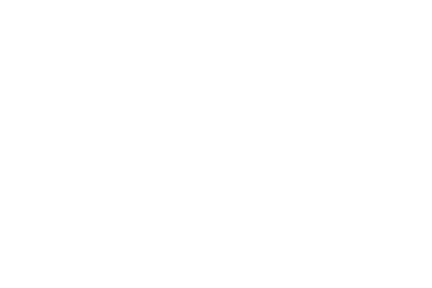

In [38]:
%matplotlib notebook
learn.fit(100)

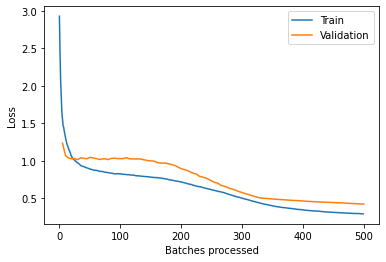

In [43]:
learn.recorder.plot_losses()

### Interpretation

In [39]:
interp = SomInterpretation.from_learner(learn)

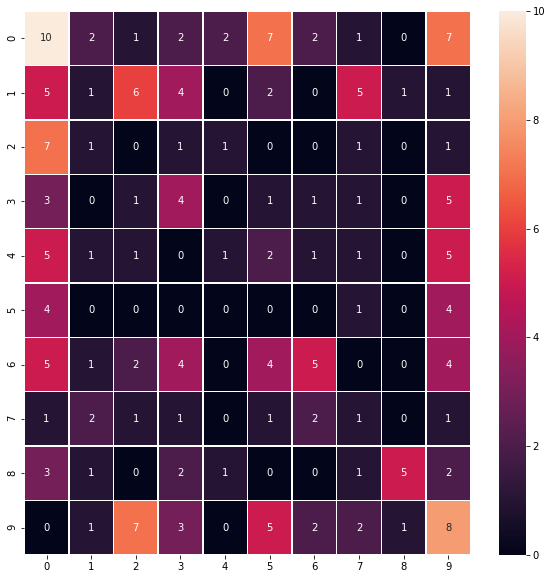

In [40]:
%matplotlib inline
interp.show_hitmap()

/usr/local/lib/python3.6/dist-packages/fastsom-0.1-py3.6.egg/fastsom/interp/interp.py:158: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


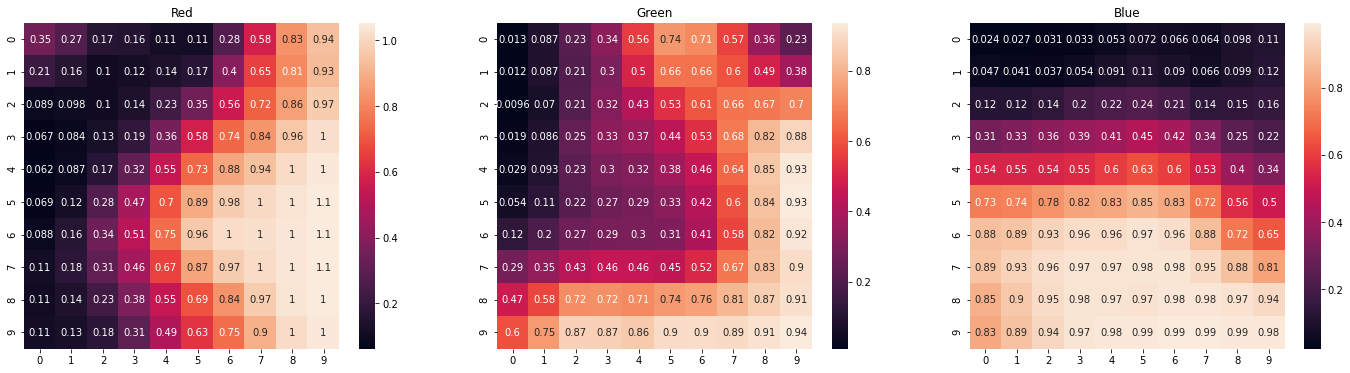

In [41]:
%matplotlib inline
interp.show_feature_heatmaps(cont_labels=labels, recategorize=False)

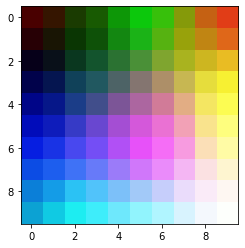

In [42]:
%matplotlib inline
interp.show_weights()